PROBLEM STATEMENT

Zaimportowane dane przedstawiają koszty leczenia w Stanach Zjednoczonych. Naszym zadaniem jest zbadanie przedstawionych danych, rozpoznanie korelacji pomiędzy poszczególnymi kategoriami oraz utworzenie modeli, które w sposób dokładny będą mogły przewidzieć koszty leczenia w zależności od danych zmiennych. Przedstawione dane pochodzą z wcześniej udostępnionej bazy danych.

DATA COLLECTION

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from math import sqrt

%matplotlib inline

In [92]:
df = pd.read_csv('https://raw.githubusercontent.com/Kamil128/ProjektPraktycznyRegresja/main/data/medical_cost/medical_cost.csv')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [94]:
df.head(n=10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [95]:
df.tail(n=10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [96]:
df.sample(n=10)

,age,sex,bmi,children,smoker,region,charges
117,29,female,27.940,1,yes,southeast,19107.77960
376,39,female,24.890,3,yes,northeast,21659.93010
1037,45,female,30.495,1,yes,northwest,39725.51805
69,28,male,23.980,3,yes,southeast,17663.14420
10,25,male,26.220,0,no,northeast,2721.32080
579,25,female,23.465,0,no,northeast,3206.49135
898,18,female,40.260,0,no,southeast,1634.57340
764,45,female,25.175,2,no,northeast,9095.06825
1327,51,male,30.030,1,no,southeast,9377.90470
739,29,male,35.500,2,yes,southwest,44585.45587


In [97]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [98]:
df[['sex', 'smoker', 'region']].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


DATA CLEANING

In [99]:
# Usunięcie duplikatów
df = df.drop_duplicates().reset_index(drop=True)

In [7]:
# Zamienienie wartości typu object oraz int na wartości typu float
# df_copy = df.copy()
# ordinal_encoder = OrdinalEncoder()
# df_copy[['sex', 'smoker', 'region']] = ordinal_encoder.fit_transform(df_copy[['sex', 'smoker', 'region']])
# df_copy[["age", "children"]] = df_copy[["age", "children"]].astype(float)

In [100]:
#one hot encoding
df_copy = pd.get_dummies(df, columns = ['sex', 'smoker', 'region'])

print(df_copy)

      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830           0         1          1   
1334   18  31.920         0   2205.98080           1         0          1   
1335   18  36.850         0   1629.83350           1         0          1   
1336   21  25.800         0   2007.94500           1         0          1   
1337   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

In [60]:
# Usunięcie wartości odstających
df_copy = df_copy[df_copy['charges'] < 50000]

In [61]:
# Zaokrąglenie wartości w kolumnach "bmi" i "charges" do dwóch miejsc po przecinku
df_copy.bmi = df_copy.bmi.round(2)
df_copy.charges = df_copy.charges.round(2)

In [62]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1330 non-null   int64  
 1   bmi               1330 non-null   float64
 2   children          1330 non-null   int64  
 3   charges           1330 non-null   float64
 4   sex_female        1330 non-null   uint8  
 5   sex_male          1330 non-null   uint8  
 6   smoker_no         1330 non-null   uint8  
 7   smoker_yes        1330 non-null   uint8  
 8   region_northeast  1330 non-null   uint8  
 9   region_northwest  1330 non-null   uint8  
 10  region_southeast  1330 non-null   uint8  
 11  region_southwest  1330 non-null   uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 62.3 KB


EXPLORATORY DATA ANALYSYS

Text(0.5, 1.0, 'Zależność bmi od wieku')

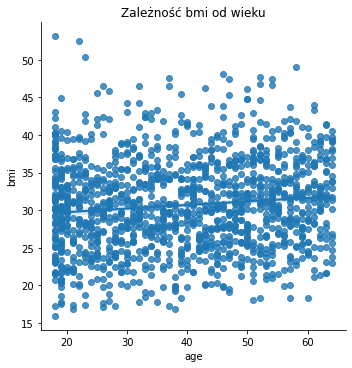

In [102]:
#Regresja między wartościami "age" i "bmi"
sns.lmplot(x='age', y='bmi', data=df)
plt.title('Zależność bmi od wieku')

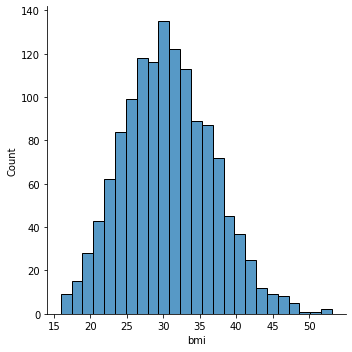

In [15]:
# Wykres przedstawiający rozkład wartości "bmi"
sns.displot(df.bmi)

FEATURE ENGINEERING

<AxesSubplot:>

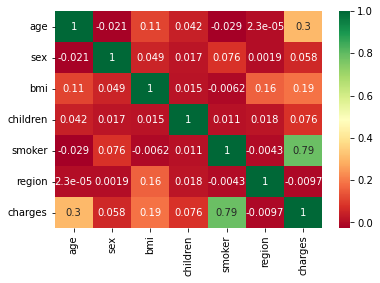

In [16]:
# Liczenie korelacji między zmiennymi
count_corr=df_copy.corr()

# Heatmapa korelacji między zmiennymi
sns.heatmap(count_corr, cmap= 'RdYlGn',annot=True)

Text(0.5, 1.0, 'Zależność opłat od wieku')

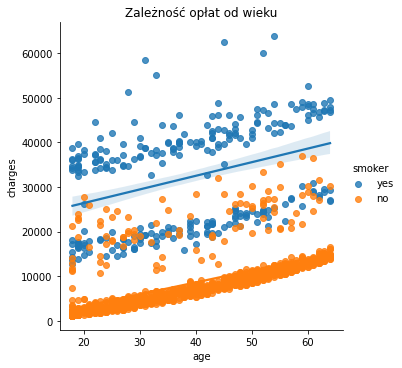

In [101]:
# Regresja między wartościami "age" i "charges" wraz z wykazanim zależności od wartości "smoker"
sns.lmplot(x='age', y='charges', data=df, hue='smoker')

plt.title('Zależność opłat od wieku')

Text(0.5, 1.0, 'Zależność opłat od bmi')

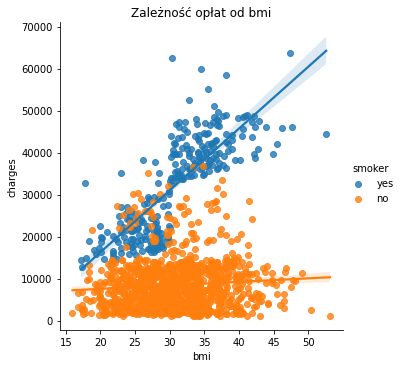

In [122]:
# Regresja między wartościami "bmi" i "charges" wraz z wykazanim zależności od wartości "smoker"
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker')

plt.title('Zależność opłat od bmi')

<AxesSubplot:xlabel='sex', ylabel='charges'>

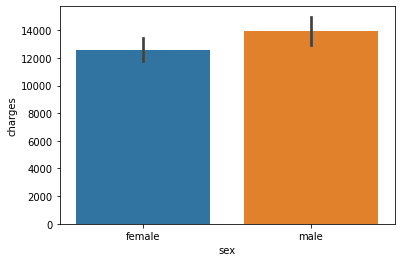

In [19]:
# Wykres słupkowy przedstawia odchylenie standardowe wartości "sex"
sns.barplot(x='sex', y='charges', data=df)

MODELLING

In [109]:
# Stworzenie zbioru testowego i treningowego dla wszystkich zmiennych
y = df_copy['charges'].values
df_copy1=df_copy.drop('charges', axis=1)
X = df_copy1.values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


In [110]:
# Model regresji liniowej
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

MSE_lr_train = sqrt(mean_squared_error(y_train, y_train_pred))
MSE_lr_test = sqrt(mean_squared_error(y_test, y_test_pred))
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, y_test_pred)


In [111]:
# Model drzewa decyzyjnego
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

MSE_t_train = sqrt(mean_squared_error(y_train, y_train_pred))
MSE_t_test = sqrt(mean_squared_error(y_test, y_test_pred))
r2_t_train = r2_score(y_train, y_train_pred)
r2_t_test = r2_score(y_test, y_test_pred)



In [112]:
# Wyniki zastosowanych modeli
wyniki = pd.DataFrame({'RMSE train':[MSE_lr_train, MSE_t_train],
                      'RMSE test':[MSE_lr_test, MSE_t_test],
                      'R^2 train':[r2_lr_train, r2_t_train],
                      'R^2 test':[r2_lr_test, r2_t_test]})
wyniki.index=['Linear Regression', 'Decision Tree']
wyniki

,RMSE train,RMSE test,R^2 train,R^2 test
Linear Regression,5949.111946,6445.635474,0.748860,0.753039
Decision Tree,4257.683866,5198.093324,0.871365,0.839385


In [113]:
# Stworzenie zbioru testowego i treningowego dla wybranych zmiennych
X = df_copy[['age', 'bmi', 'smoker_no', 'smoker_yes']].values
y = df_copy['charges'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [114]:
# Model regresji liniowej
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

MSE_lr_train = sqrt(mean_squared_error(y_train, y_train_pred))
MSE_lr_test = sqrt(mean_squared_error(y_test, y_test_pred))
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, y_test_pred)

In [115]:
# Model drzewa decyzyjnego
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

MSE_t_train = sqrt(mean_squared_error(y_train, y_train_pred))
MSE_t_test = sqrt(mean_squared_error(y_test, y_test_pred))
r2_t_train = r2_score(y_train, y_train_pred)
r2_t_test = r2_score(y_test, y_test_pred)

In [118]:
# Wyniki zastosowanych modeli
wyniki = pd.DataFrame({'RMSE train':[MSE_lr_train, MSE_t_train],
                      'RMSE test':[MSE_lr_test, MSE_t_test],
                      'R^2 train':[r2_lr_train, r2_t_train],
                      'R^2 test':[r2_lr_test, r2_t_test]})
wyniki.index=['Linear Regression', 'Decision Tree']
wyniki

,RMSE train,RMSE test,R^2 train,R^2 test
Linear Regression,5993.689000,6474.604032,0.745083,0.750814
Decision Tree,4276.750495,5227.982731,0.870211,0.837533


In [119]:
# Kroswalidacja zastosowanych modeli dla wybranych zmiennych
from sklearn.model_selection import KFold
X = df_copy[["age","bmi", "smoker_no", "smoker_yes"]]
y = df_copy["charges"]
cv = KFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv.split(X, y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]

# Model regresji liniowej
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

MSE_lr_train = sqrt(mean_squared_error(y_train, y_train_pred))
MSE_lr_test = sqrt(mean_squared_error(y_test, y_test_pred))
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, y_test_pred)

# Model drzewa decyzyjnego
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

MSE_t_train = sqrt(mean_squared_error(y_train, y_train_pred))
MSE_t_test = sqrt(mean_squared_error(y_test, y_test_pred))
r2_t_train = r2_score(y_train, y_train_pred)
r2_t_test = r2_score(y_test, y_test_pred)

In [121]:
#Wyniki  modeli
wyniki = pd.DataFrame({'RMSE train':[MSE_lr_train, MSE_t_train],
                      'RMSE test':[MSE_lr_test, MSE_t_test],
                      'R^2 train':[r2_lr_train, r2_t_train],
                      'R^2 test':[r2_lr_test, r2_t_test]})
wyniki.index=['Linear Regression', 'Decision Tree']
wyniki

,RMSE train,RMSE test,R^2 train,R^2 test
Linear Regression,6101.675739,6021.534220,0.747738,0.745179
Decision Tree,4407.112030,4690.218665,0.868398,0.845401
